# 1. Generate Synthetic Stock Market Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:

np.random.seed(42)
n_samples = 10000

stock_numbers = np.random.randint(1, 1000, n_samples) 

stock_names = [{i%100} for i in range(n_samples)]  


start_date = '2024-01-01'
end_date = '2024-01-10'


# Generate random numbers between 0 and 100
random_numbers = np.random.rand(n_samples) * 100


data = {
    'Stock_Number': stock_numbers,
    'Stock_Name': stock_names,
    'Open': np.random.rand(n_samples) * 100,
    'High': np.random.rand(n_samples) * 100,
    'Low': np.random.rand(n_samples) * 100,
    'Close': np.random.rand(n_samples) * 100,
    'Volume': np.random.rand(n_samples) * 1e6
    
}

df = pd.DataFrame(data)


df['Target'] = (df['Close'] > df['Open']).astype(int)




In [3]:
df.sample(5)

,Stock_Number,Stock_Name,Open,High,Low,Close,Volume,Target
3537,220,{37},2.606661,19.287638,58.139413,83.468790,359124.626552,1
156,840,{56},62.270040,64.065317,42.647984,71.225975,318679.344339,1
8568,997,{68},39.553875,75.564503,83.176783,25.930843,684097.399905,0
7370,663,{70},91.702425,85.889164,24.524056,25.845683,10136.865406,0
8385,260,{85},76.192338,8.481764,69.039698,42.531352,175274.191289,0


In [4]:
# Check target distribution

print("Target Distribution:")
df['Target'].value_counts(normalize=True)


Target Distribution:


1    0.5032
0    0.4968
Name: Target, dtype: float64

In [5]:
df.columns

Index(['Stock_Number', 'Stock_Name', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Target'],
      dtype='object')

In [6]:
cols= [ 'Open', 'High', 'Low', 'Close', 'Volume']

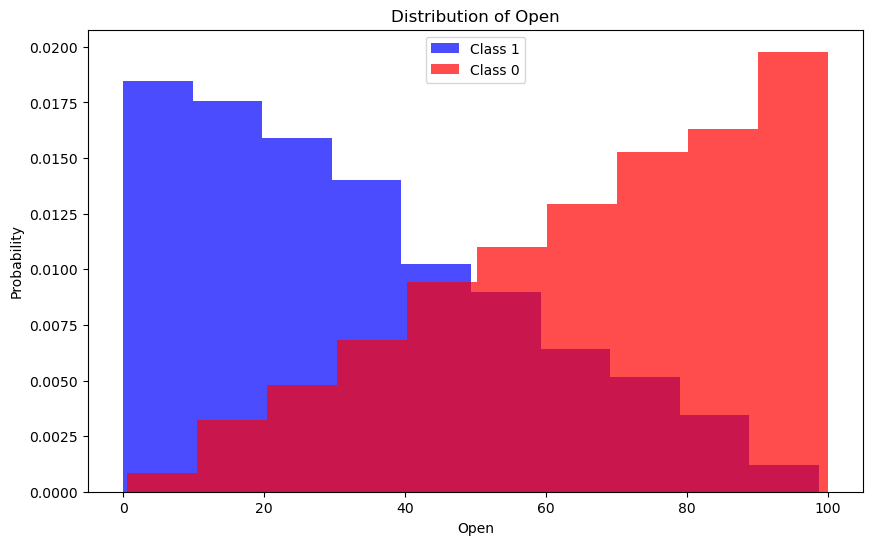

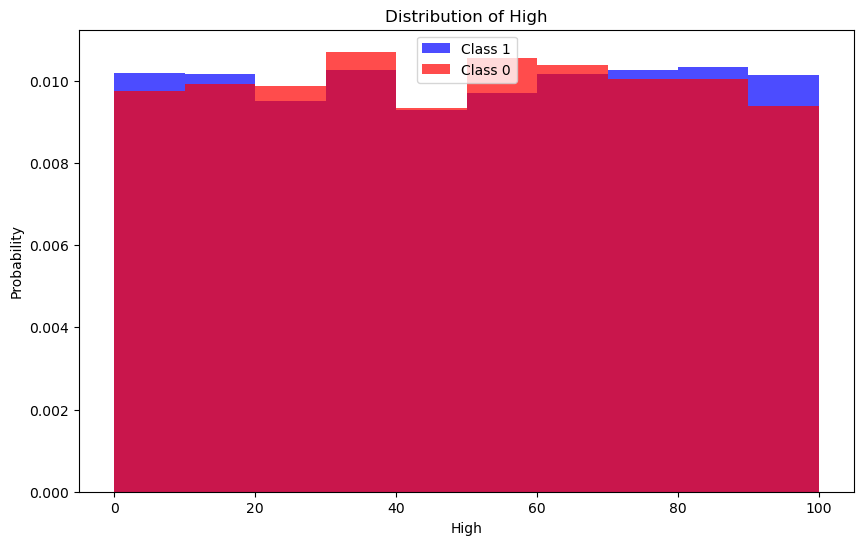

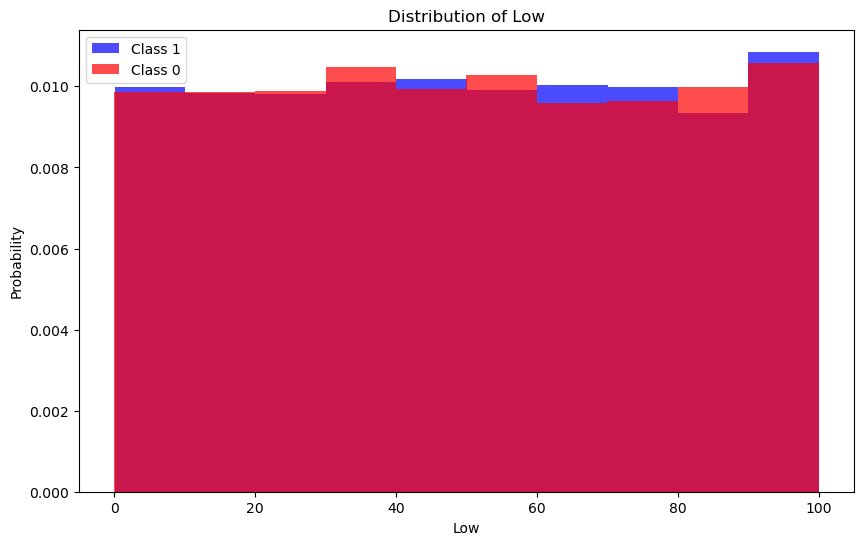

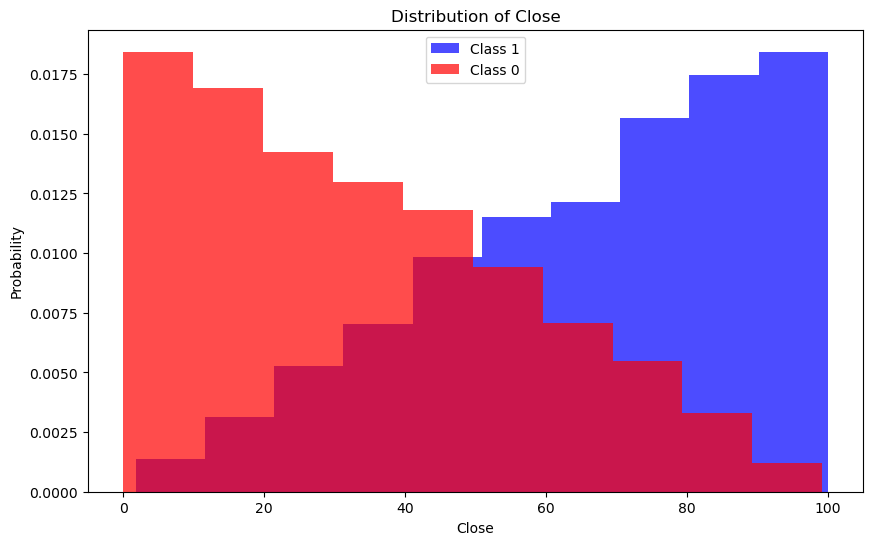

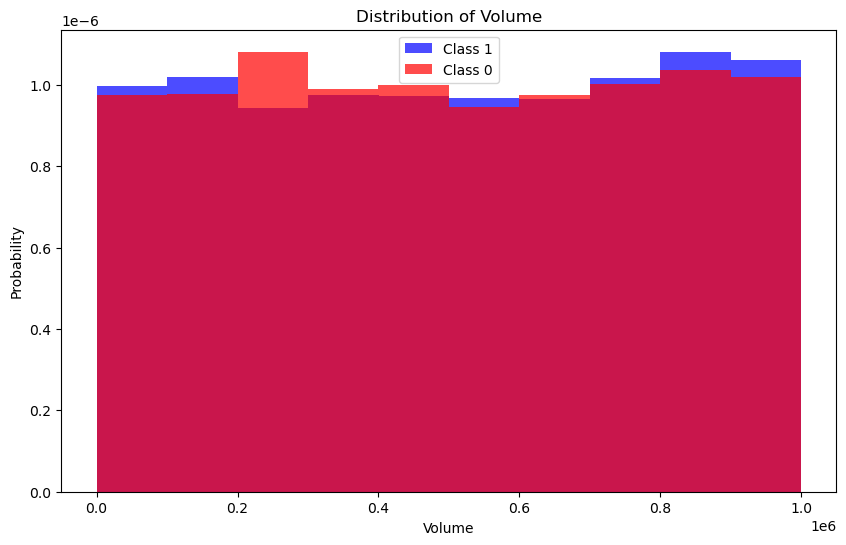

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Features to plot
numeric_features = ['Open', 'High', 'Low', 'Close', 'Volume']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    
    # Plot histograms for each target class
    df[df['Target'] == 1][feature].plot(kind='hist', color='blue', alpha=0.7, density=True, label='Class 1')
    df[df['Target'] == 0][feature].plot(kind='hist', color='red', alpha=0.7, density=True, label='Class 0')
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()


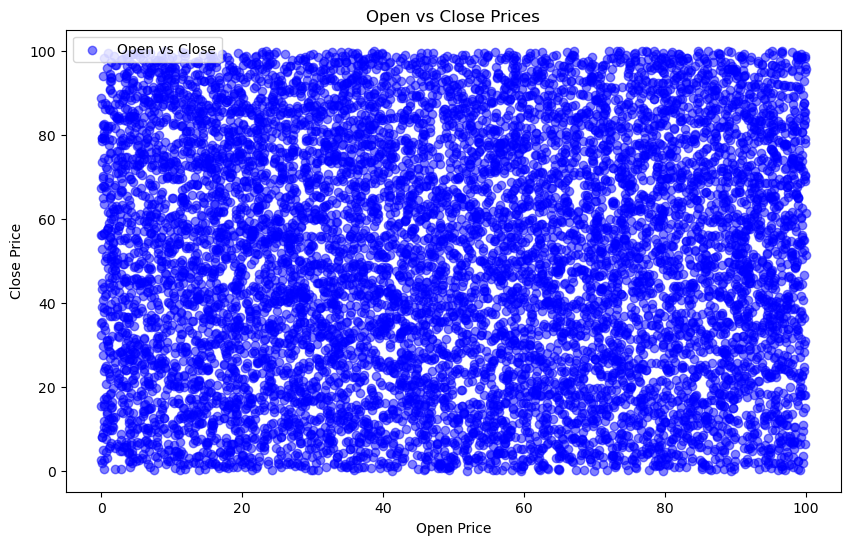

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.5, c='blue', label='Open vs Close')
plt.title('Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()


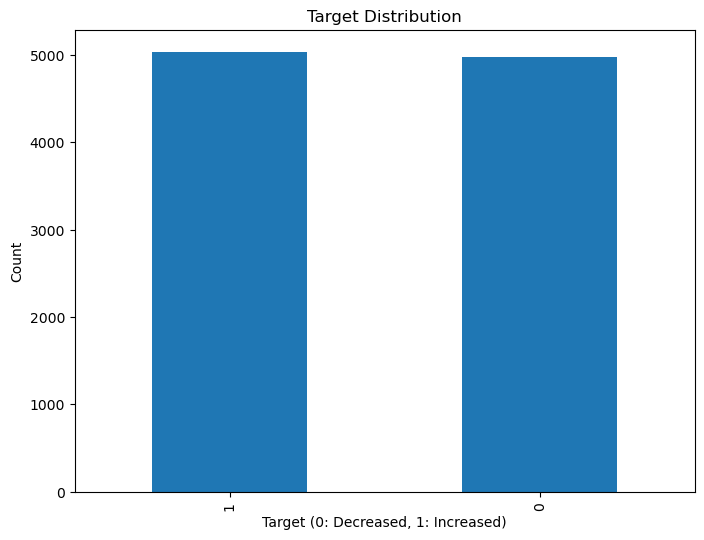

In [9]:

# Visualize target distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target (0: Decreased, 1: Increased)')
plt.ylabel('Count')
plt.show()

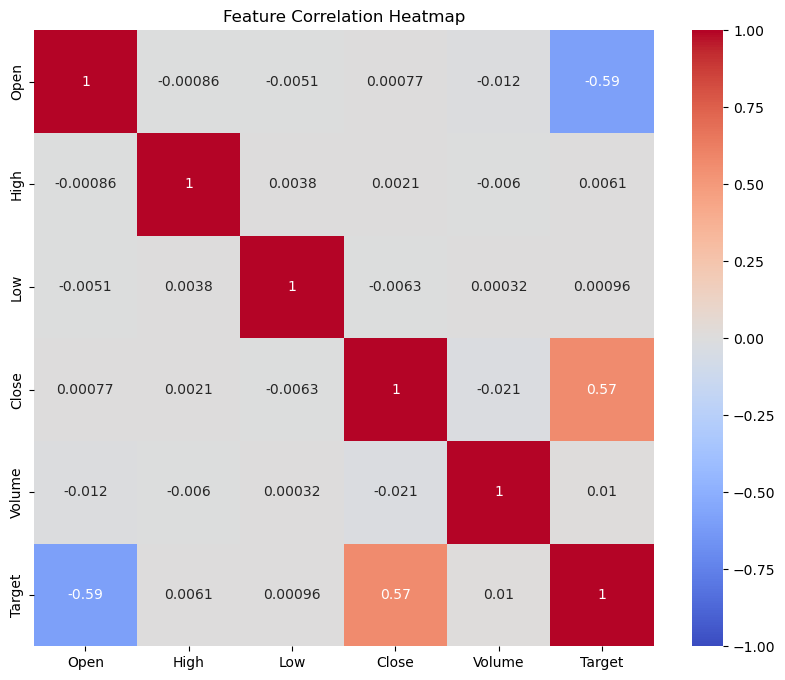

In [10]:
# Calculate correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Target']].corr()

# Visualize correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

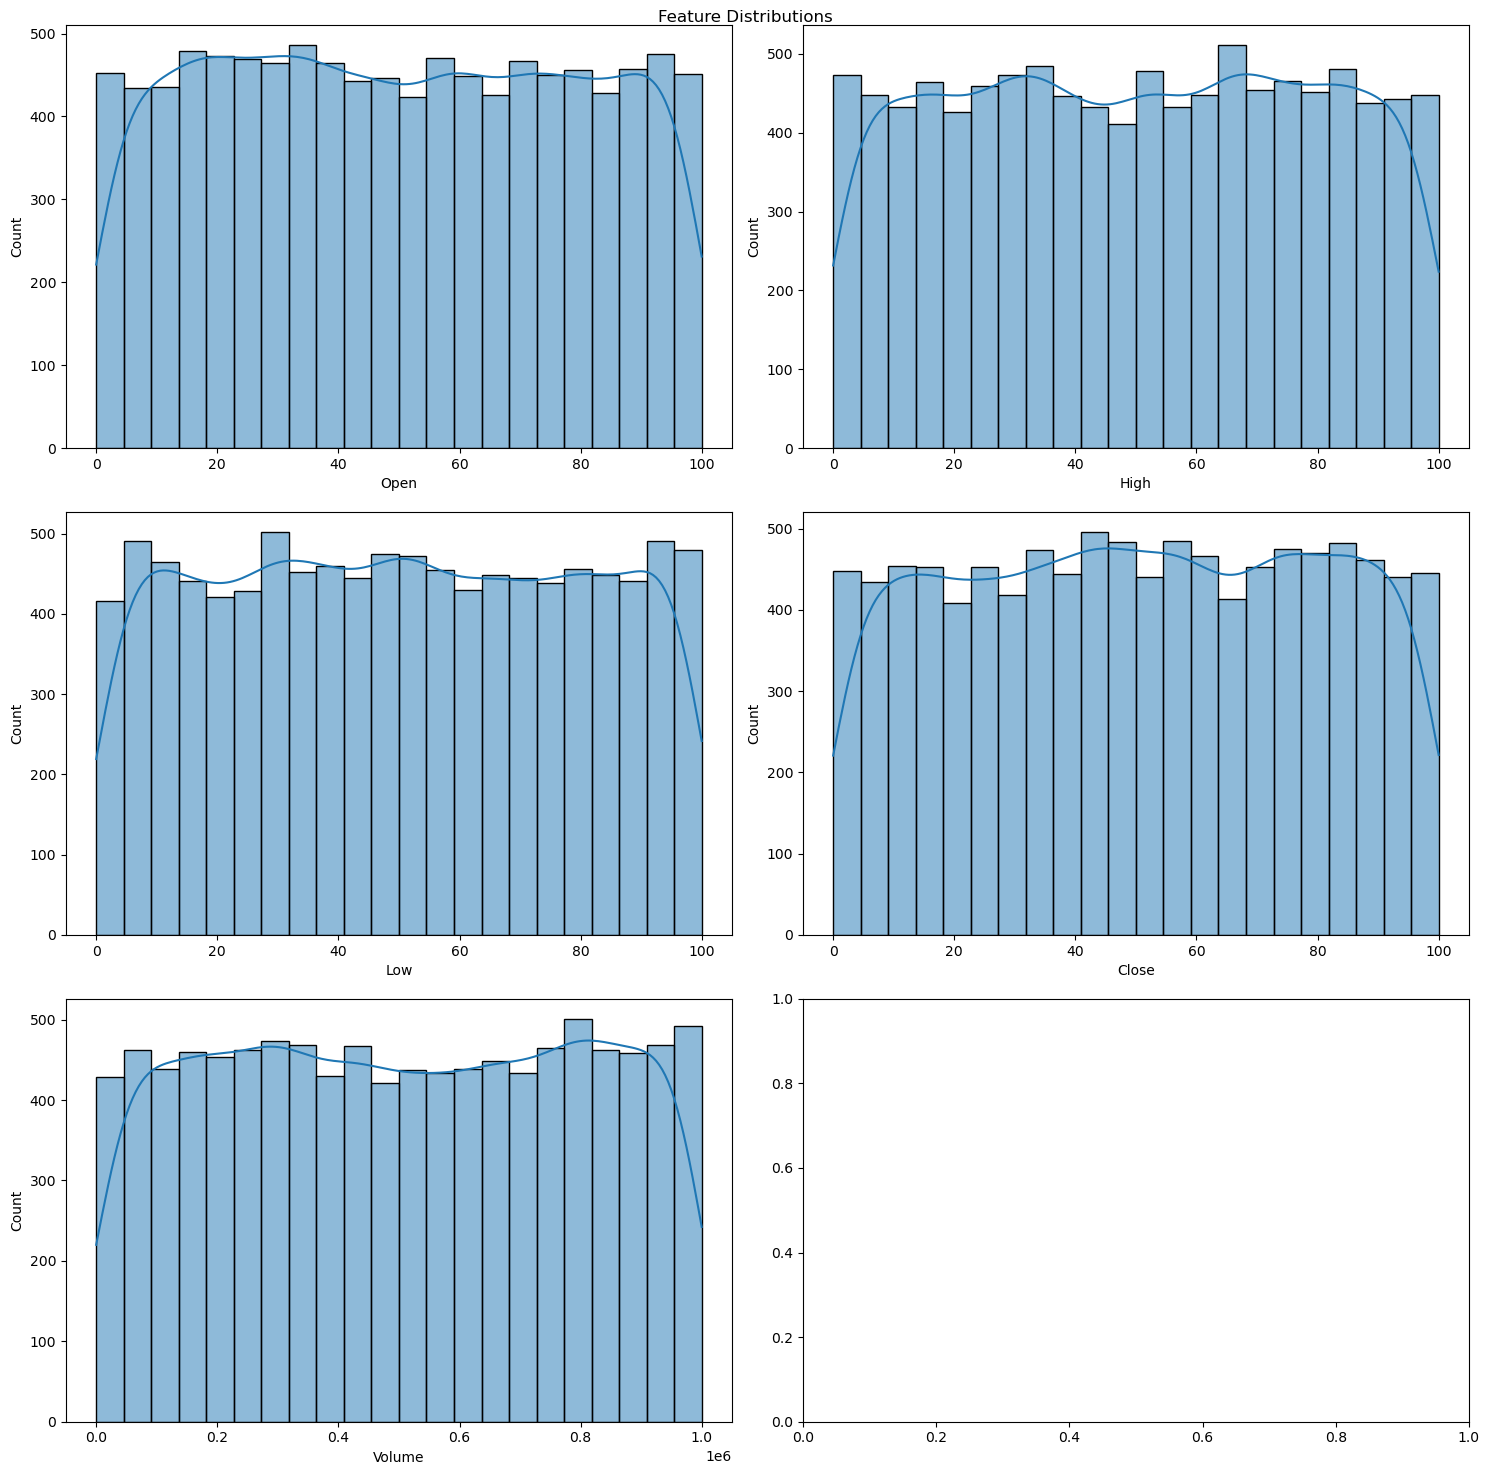

In [11]:
# Plot histograms for numerical features
numerical_features = ['Open', 'High', 'Low', 'Close', 'Volume']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Feature Distributions')

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=feature, kde=True, ax=axes[row, col])

plt.tight_layout()
plt.show()

In [12]:
# Calculate price change percentage
df['Price_Change_Pct'] = (df['Close'] - df['Open']) / df['Open'] * 100



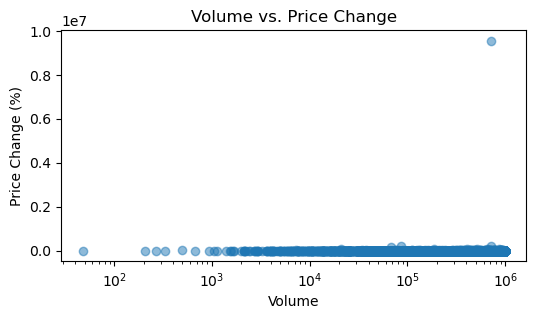

Correlation between Volume and Price Change: 0.0065


In [13]:
# Create a scatter plot of Volume vs. Price Change
plt.figure(figsize=(6,3))
plt.scatter(df['Volume'], df['Price_Change_Pct'], alpha=0.5)
plt.title('Volume vs. Price Change')
plt.xlabel('Volume')
plt.ylabel('Price Change (%)')
plt.xscale('log')  # Use log scale for volume due to potential large range
plt.show()

# Calculate correlation between Volume and Price Change
volume_price_change_corr = df['Volume'].corr(df['Price_Change_Pct'])
print(f"Correlation between Volume and Price Change: {volume_price_change_corr:.4f}")

# 2. Prepare Data for Classification



Split the DataFrame into features (X) and target (y), then into training and testing sets.

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])



In [15]:
train

,Stock_Number,Stock_Name,Open,High,Low,Close,Volume,Target,Price_Change_Pct
4965,188,{65},47.239997,83.053335,41.504656,43.973817,887623.520610,0,-6.914013
2210,796,{10},49.092509,95.384596,12.111708,98.728678,450214.902470,1,101.107417
3325,672,{25},32.392808,93.813454,50.425366,11.734543,709376.260850,0,-63.774235
7498,710,{98},29.925281,89.427655,32.392206,31.891025,593390.218573,1,6.568843
4078,508,{78},95.857768,93.211152,48.338933,11.416029,89228.078011,0,-88.090659
...,...,...,...,...,...,...,...,...,...
5768,477,{68},89.064032,50.820818,87.333809,82.553664,427583.012210,0,-7.309761
8901,496,{1},41.982545,54.866814,96.106407,42.160565,78412.805051,1,0.424035
6511,490,{11},59.076806,88.605431,84.402270,68.604662,878870.015635,1,16.127914
9258,802,{58},92.086595,5.707213,28.903443,24.764877,154988.627968,0,-73.106968


In [16]:
valid

,Stock_Number,Stock_Name,Open,High,Low,Close,Volume,Target,Price_Change_Pct
7827,886,{27},85.019128,30.603470,33.375779,33.643129,177505.093089,0,-60.428753
1313,899,{13},45.440356,24.825811,22.897149,49.021979,326840.937374,1,7.882030
5398,574,{98},69.241196,35.734737,30.380437,39.320094,751350.603995,0,-43.212861
9763,373,{63},15.681733,47.561371,38.622991,65.372736,683311.463693,1,316.871871
9681,71,{81},9.545125,26.991850,46.382593,44.973861,914006.607777,1,371.171005
...,...,...,...,...,...,...,...,...,...
897,1,{97},83.251217,84.794346,58.459487,40.624757,414425.302317,0,-51.202207
3287,833,{87},30.724225,51.320846,31.469976,6.978526,351200.254085,0,-77.286567
8238,443,{38},20.396232,21.044475,76.331892,46.689408,236777.222512,1,128.911934
6318,195,{18},41.608048,1.103608,89.487050,39.952337,425407.637710,0,-3.979304


In [17]:
test

,Stock_Number,Stock_Name,Open,High,Low,Close,Volume,Target,Price_Change_Pct
2636,117,{36},40.459867,20.952133,12.837781,76.228318,732529.111414,1,88.404768
7263,968,{63},96.067884,91.315391,80.136010,25.427861,254781.432288,0,-73.531361
165,805,{65},8.722414,28.250590,13.704693,97.759941,648662.226367,1,1020.789987
5618,505,{18},29.150975,89.829497,57.930554,29.924599,424678.206294,1,2.653852
8773,660,{73},20.688831,65.838431,96.693707,18.348186,561552.999512,0,-11.313565
...,...,...,...,...,...,...,...,...,...
7858,836,{58},43.827458,77.314435,24.689012,20.376776,193162.438898,0,-53.506827
1418,779,{18},47.219670,33.210613,5.785772,51.243612,751761.004179,1,8.521748
2560,895,{60},96.074182,33.645494,78.676311,4.860449,816655.153899,0,-94.940941
4219,893,{19},43.187039,93.989636,38.915813,35.084178,931393.433091,0,-18.762251


In [18]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For oversampling

def scale_dataset(df, oversample=False):
    # Extract features and target
    X = df.drop(['Target', 'Stock_Name'], axis=1)  # Drop non-numeric columns
    y = df['Target']
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    if oversample:
        # Handle class imbalance using SMOTE
        smote = SMOTE()
        X_scaled, y = smote.fit_resample(X_scaled, y)
    
    return X_scaled, y




X_valid, y_valid = scale_dataset(valid, oversample=False)

X_test, y_test = scale_dataset(test, oversample=False)

X_train = train.drop(columns=['Target'])

y_train = train['Target']



In [19]:
len(y_train), sum(y_train==1)

(6000, 3021)

 # Machine Learning for Everybody – Full Course


# kNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model

KNeighborsClassifier()

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducibility
np.random.seed(42)

# Generate stock data
n_samples = 10000
stock_numbers = np.random.randint(1, 1000, n_samples)
stock_names = [i % 100 for i in range(n_samples)]  # Changed to a list

data = {
    'Stock_Number': stock_numbers,
    'Stock_Name': stock_names,
    'Open': np.random.rand(n_samples) * 100,
    'High': np.random.rand(n_samples) * 100,
    'Low': np.random.rand(n_samples) * 100,
    'Close': np.random.rand(n_samples) * 100,
    'Volume': np.random.rand(n_samples) * 1e6
}

df = pd.DataFrame(data)
df['Target'] = (df['Close'] > df['Open']).astype(int)

# Convert categorical 'Stock_Name' to numerical
label_encoder = LabelEncoder()
df['Stock_Name'] = label_encoder.fit_transform(df['Stock_Name'])

# Split the data
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(0.6*len(df)), int(0.8*len(df))])

# Extract features and targets
X_train = train.drop(columns=['Target'])
y_train = train['Target']
X_valid = valid.drop(columns=['Target'])
y_valid = valid['Target']
X_test = test.drop(columns=['Target'])
y_test = test['Target']

# Initialize KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [23]:
y_pred = knn_model.predict(X_test)

C:\Users\segev\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1006
           1       0.50      0.48      0.49       994

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



אחוז דיוק די טוב וגבוהה

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()

nb_model = nb_model.fit(X_train, y_train)

In [27]:
y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1006
           1       0.99      1.00      0.99       994

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



 # Log Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg_model = LogisticRegression()

lg_model = lg_model.fit(X_train, y_train)

C:\Users\segev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1006
           1       1.00      1.00      1.00       994

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



# SVM

In [31]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)


In [32]:
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.47      0.48      1006
           1       0.48      0.49      0.48       994

    accuracy                           0.48      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.48      0.48      0.48      2000



# Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score

# Initialize and train the model
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test) 



In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1006
           1       0.98      0.99      0.99       994

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)




In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1006
           1       0.98      0.99      0.99       994

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



# xgboost

In [37]:
#!conda install -y -c conda-forge xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score, f1_score
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb

import warnings  # `do not disturbe` mode
warnings.filterwarnings("ignore")

In [38]:
y = df['Target']


weights = (y == 0).sum() / (1.0 * (y == 1).sum())
weights

1.0016012810248198

In [39]:
clf = RandomForestClassifier(max_depth=2, random_state=1337)

clf.fit(X_train, y_train)

accuracy_score(y_test, clf.predict(X_test))

0.919

In [40]:
model = xgb.XGBClassifier(
                          scale_pos_weight = weights,
                          n_jobs = 4,
                          objective='binary:logistic',
                          use_label_encoder = False
                        )
 
start = time.time()
modelfit = model.fit(X_train, y_train, eval_metric='logloss')
fittingTime = time.time() - start
 
start = time.time()
prediction = modelfit.predict(X_test)
InferenceTime = time.time() - start
 
F1score = f1_score(y_test, prediction)
probabilities = modelfit.predict_proba(X_test)
AUPRC = average_precision_score(y_test, probabilities[:, 1])
acc = accuracy_score(y_test, model.predict(X_test))
 
print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))
print('F1 Score = {}'.format(F1score))
print('Fitting Time = {}'.format(fittingTime))
print('Inference Time = {}'.format(InferenceTime))
print('Accuracy = {}'.format(acc))

AUPRC = 0.9996831719239203
F1 Score = 0.9914786967418546
Fitting Time = 0.26038479804992676
Inference Time = 0.004698991775512695
Accuracy = 0.9915


In [41]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1006
           1       0.99      0.99      0.99       994

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

